## Open Journey Model based on MidJourney

In [1]:
import torch
from diffusers import DiffusionPipeline


if torch.cuda.is_available():
    device = torch.device("cuda")
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
    print ("CUDA & MPS devices not found.")

print("Testing torch device")
torch.ones(2, device=device) 

/Users/captain2mac/Documents/Code/HuggingFace/ml_env/lib/python3.9/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/Users/captain2mac/Documents/Code/HuggingFace/ml_env/lib/python3.9/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/Users/captain2mac/Documents/Code/HuggingFace/ml_env/lib/python3.9/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


Testing torch device


tensor([1., 1.], device='mps:0')

### Loading the model 

In [17]:
pipeline = DiffusionPipeline.from_pretrained("prompthero/openjourney-v4").to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

### Loading LoRA weights

In [18]:
pipeline.load_lora_weights("prompthero/openjourney-lora")

/Users/captain2mac/Documents/Code/HuggingFace/ml_env/lib/python3.9/site-packages/diffusers/loaders/lora.py:708: FutureWarning: `_modify_text_encoder` is deprecated and will be removed in version 0.25. You are using an old version of LoRA backend. This will be deprecated in the next releases in favor of PEFT make sure to install the latest PEFT and transformers packages in the future.
  deprecate("_modify_text_encoder", "0.25", LORA_DEPRECATION_MESSAGE)
/Users/captain2mac/Documents/Code/HuggingFace/ml_env/lib/python3.9/site-packages/diffusers/loaders/lora.py:679: FutureWarning: `_remove_text_encoder_monkey_patch_classmethod` is deprecated and will be removed in version 0.25. You are using an old version of LoRA backend. This will be deprecated in the next releases in favor of PEFT make sure to install the latest PEFT and transformers packages in the future.
  deprecate("_remove_text_encoder_monkey_patch_classmethod", "0.25", LORA_DEPRECATION_MESSAGE)


### Using the model

In [19]:
prompt = "a happy cat writing code fast"
negative_prompt = "low quality, nsfw"
output_images = 1
num_inference_steps = 40
guidance_scale = 9

output = pipeline(
    prompt=prompt,
    negative_prompt=negative_prompt,
    guidance_scale=guidance_scale,
    num_images_per_prompt=output_images,
    num_inference_steps=num_inference_steps
).images

  0%|          | 0/40 [00:00<?, ?it/s]

### Showing Outputs

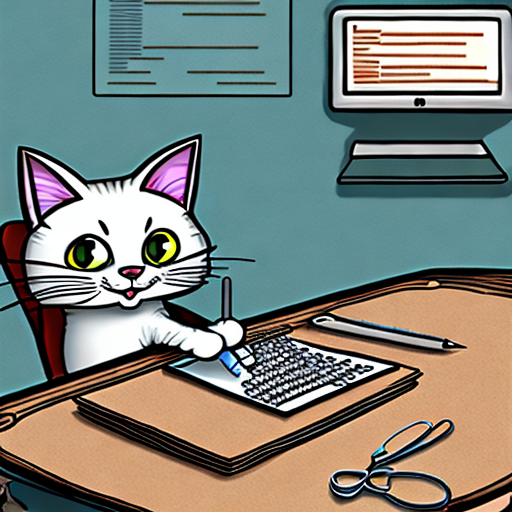

In [20]:
output[0]